In [7]:
# 표준 라이브러리
import sys
from pathlib import Path

# 서드파티 라이브러리
import pandas as pd
import plotly.express as px
import numpy as np
from scipy import stats

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR
from utils import TTest
from utils import plot_features

In [8]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

In [11]:
pandas_kwargs = {
    'memory_map': True,
    # 'encoding': 'cp949',
    'parse_dates': ['출생일자'],
    'date_format': '%Y%m%d',
    # 'index_col': 0,
}

milk_data: pd.DataFrame = pd.read_csv(DATA_DIR / 'interim' / 'milk.csv', **pandas_kwargs)
milk_data

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,MUN,305일유량,...,농후사료급여량(연계),공태일수,유량,질병군,우유등급,비유최고도달일수_log,건유전마지막유량_log,공태일수_log,출생년도,PF비
0,21133,2.007121e+13,2021-03-18,445,6.60,3.28,8.87,274,11.6,15158.0,...,38.0,2007-12-10,8.0,0.0,0.0,619,76169939,0,2등급이하,0.496970
1,21133,2.007121e+13,2021-04-28,486,3.64,3.33,8.91,166,11.0,15158.0,...,38.0,2007-12-10,8.0,0.0,0.0,619,76170244,0,1등급,0.914835
2,21133,2.007121e+13,2021-05-20,508,2.61,3.35,9.14,156,10.8,15158.0,...,38.0,2007-12-10,8.0,0.0,0.0,619,76170487,0,1등급,1.283525
3,21133,2.007121e+13,2021-06-25,544,3.75,3.49,8.99,307,14.1,15158.0,...,38.0,2007-12-10,8.0,0.0,0.0,619,76170734,0,2등급이하,0.930667
4,21133,2.007121e+13,2021-07-07,556,3.68,3.74,9.31,34,16.2,15158.0,...,38.0,2007-12-10,8.0,0.0,0.0,619,76170903,0,1등급,1.016304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58436,21149,2.021010e+13,2021-12-04,106,4.22,3.10,8.81,140,16.3,7577.0,...,NaN,2019-07-23,1.0,0.0,1.0,0,76151371,0,1등급,0.734597
58437,21149,2.021010e+13,2021-11-01,12,4.11,3.71,9.44,307,9.7,NaN,...,NaN,2019-08-04,1.0,0.0,1.0,0,76151247,0,2등급이하,0.902676
58438,21149,2.021010e+13,2021-12-04,45,4.38,3.17,9.09,20,14.2,NaN,...,NaN,2019-08-04,1.0,0.0,1.0,0,76151345,0,1등급,0.723744
58439,21149,2.021010e+13,2021-11-01,9,5.21,4.16,9.75,285,12.5,NaN,...,NaN,2019-08-31,1.0,0.0,1.0,0,76151184,0,2등급이하,0.798464


In [4]:
milk_data['출생년도'] = milk_data['출생일자'].dt.year
milk_data['출생년도']

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
58436    2019
58437    2019
58438    2019
58439    2019
58440    2019
Name: 출생년도, Length: 58441, dtype: int32

In [5]:
ttest = TTest()

In [6]:
# plot_features(milk_data, features=['산차'], )

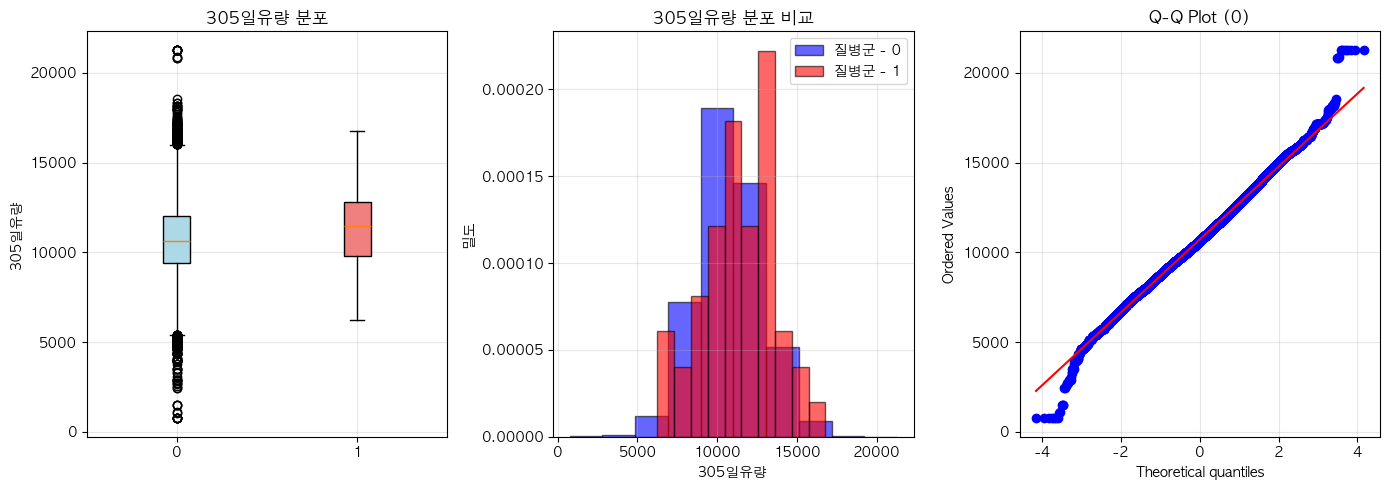


[등분산성 검정]
----------------------------------------
0.25033738454432386
Levene's test p-value: 0.2503

[데이터 정규성 검정] n=43631
----------------------------------------
왜도(Skewness): 0.115
첨도(Kurtosis): 0.352
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): -0.161
첨도(Kurtosis): -0.162
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = -2.1871, p = 0.0287
Cohen's d = -0.299 (작은 효과)

[결론]
✅ p-value(0.0287) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


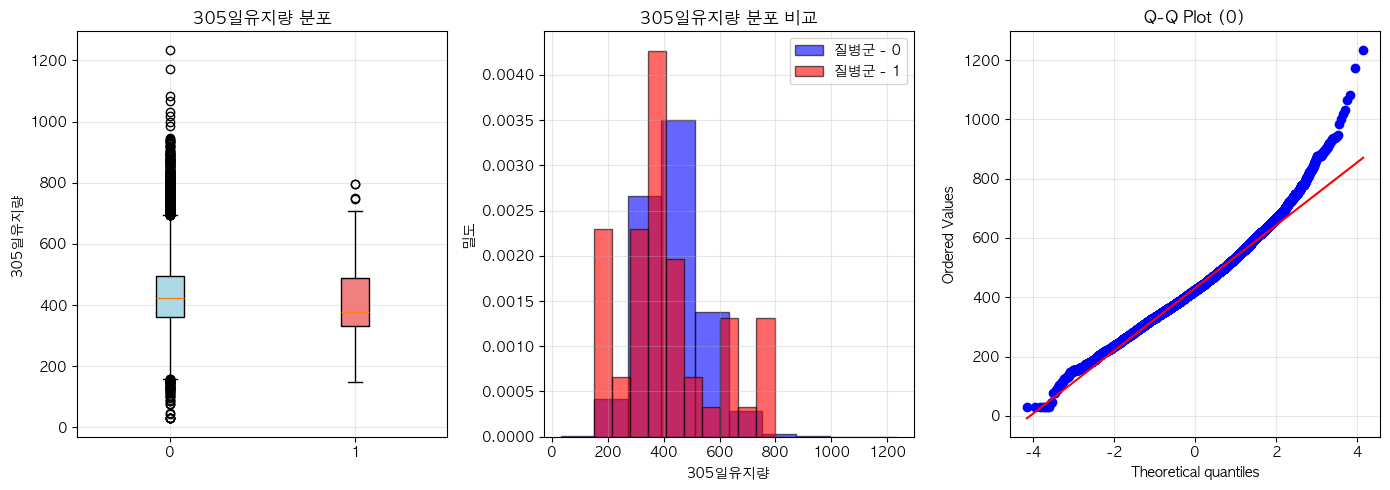


[등분산성 검정]
----------------------------------------
3.589823798793263e-06
Levene's test p-value: 0.0000

[데이터 정규성 검정] n=43631
----------------------------------------
왜도(Skewness): 0.483
첨도(Kurtosis): 0.917
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): 0.598
첨도(Kurtosis): -0.250
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Welch's t-test 결과:
t = 0.5533, p = 0.5827
Cohen's d = 0.097 (매우 작은 효과)

[결론]
❌ p-value(0.5827) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


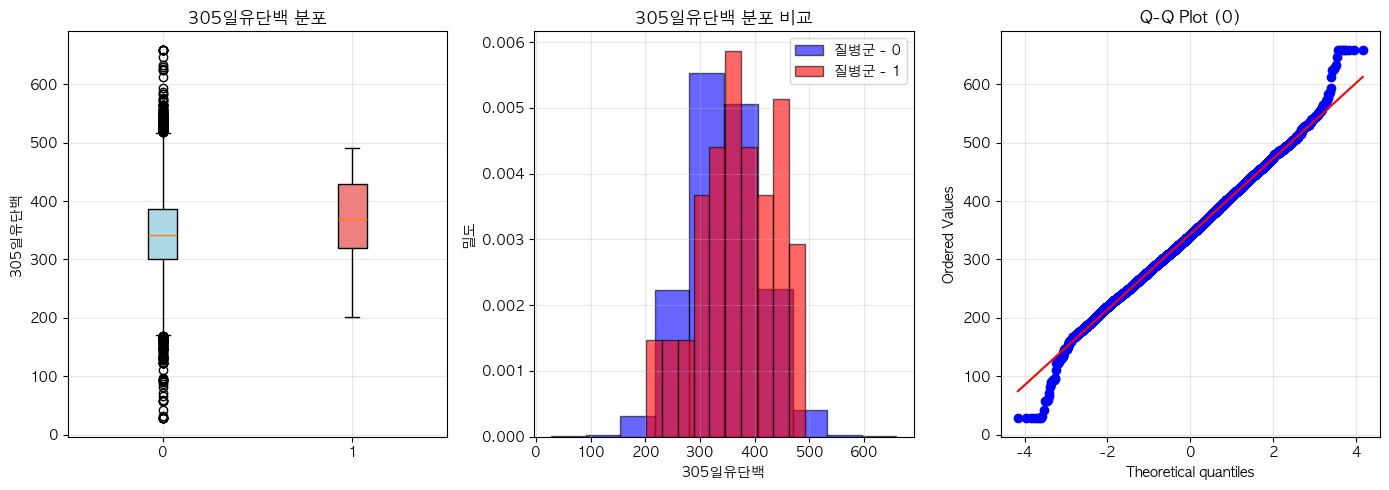


[등분산성 검정]
----------------------------------------
0.28048094268667495
Levene's test p-value: 0.2805

[데이터 정규성 검정] n=43631
----------------------------------------
왜도(Skewness): 0.079
첨도(Kurtosis): 0.190
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): -0.285
첨도(Kurtosis): -0.539
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = -2.3973, p = 0.0165
Cohen's d = -0.332 (작은 효과)

[결론]
✅ p-value(0.0165) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


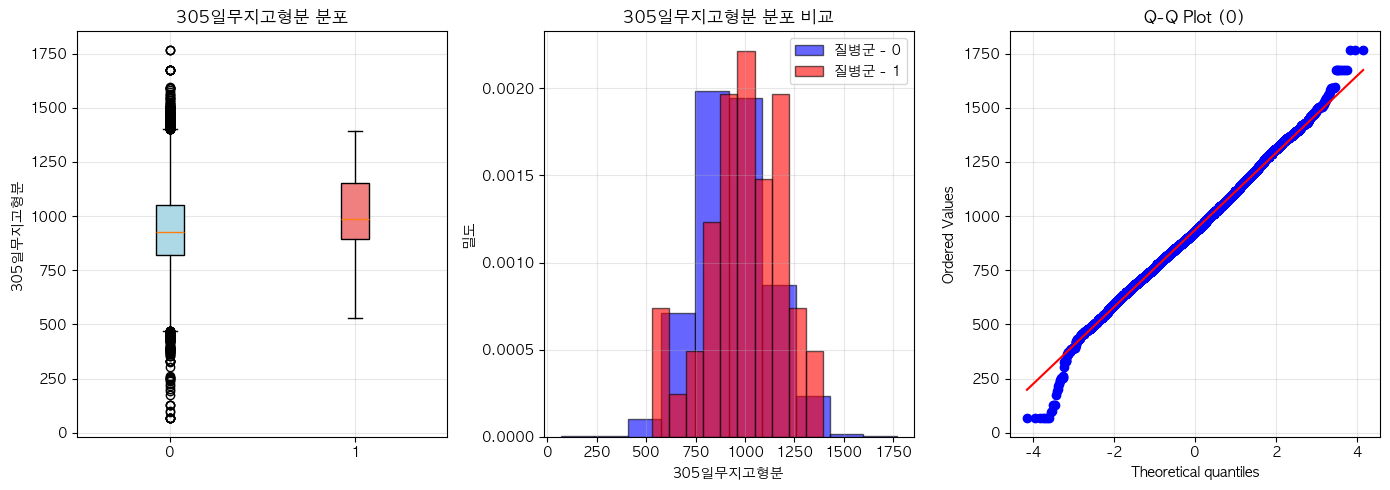


[등분산성 검정]
----------------------------------------
0.33515021079759255
Levene's test p-value: 0.3352

[데이터 정규성 검정] n=43631
----------------------------------------
왜도(Skewness): 0.110
첨도(Kurtosis): 0.240
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=47
----------------------------------------
왜도(Skewness): -0.308
첨도(Kurtosis): -0.140
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = -2.2814, p = 0.0225
Cohen's d = -0.312 (작은 효과)

[결론]
✅ p-value(0.0225) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


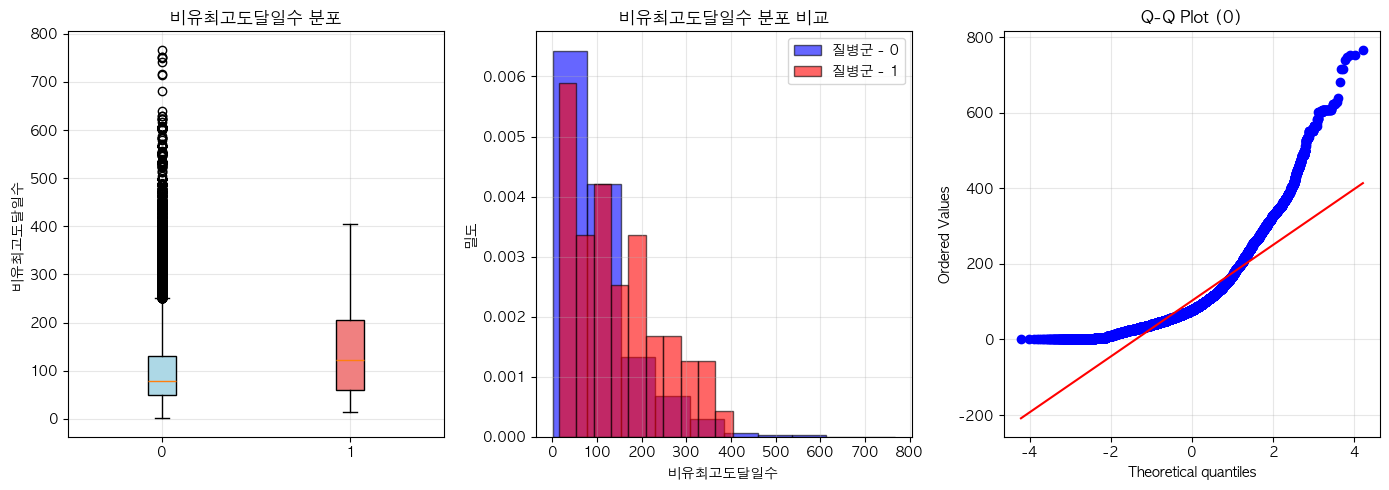


[등분산성 검정]
----------------------------------------
0.0032735692222862884
Levene's test p-value: 0.0033

[데이터 정규성 검정] n=58377
----------------------------------------
왜도(Skewness): 1.888
첨도(Kurtosis): 5.007
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.671
첨도(Kurtosis): -0.399
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Welch's t-test 결과:
t = -3.4350, p = 0.0011
Cohen's d = -0.481 (작은 효과)

[결론]
✅ p-value(0.0011) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


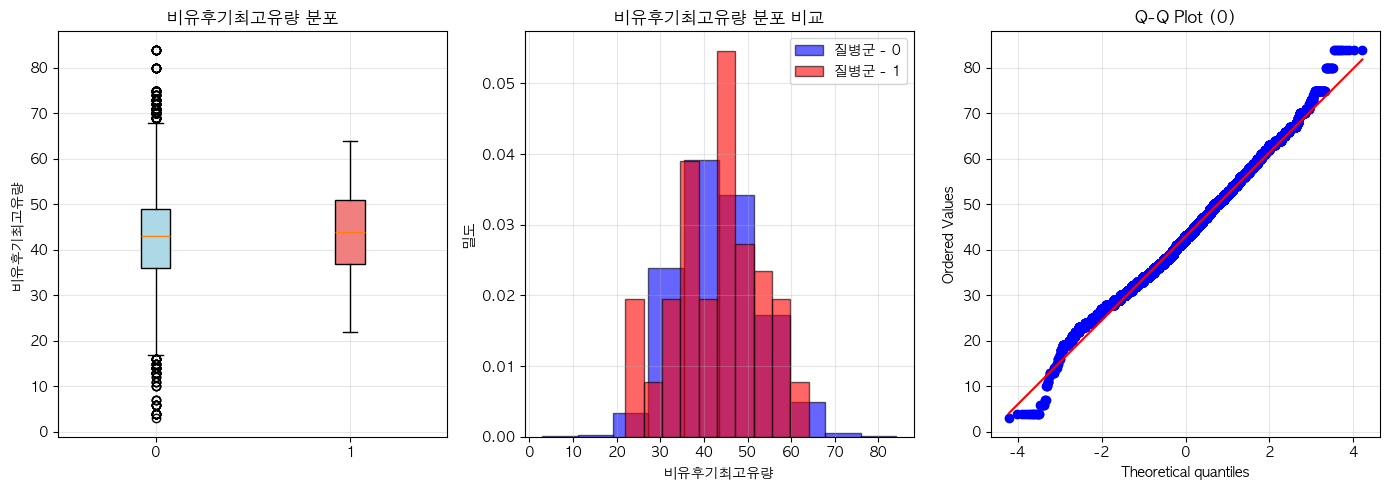


[등분산성 검정]
----------------------------------------
0.41906981661172626
Levene's test p-value: 0.4191

[데이터 정규성 검정] n=54669
----------------------------------------
왜도(Skewness): 0.228
첨도(Kurtosis): -0.024
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): -0.210
첨도(Kurtosis): -0.479
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = -0.0483, p = 0.9615
Cohen's d = -0.006 (매우 작은 효과)

[결론]
❌ p-value(0.9615) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


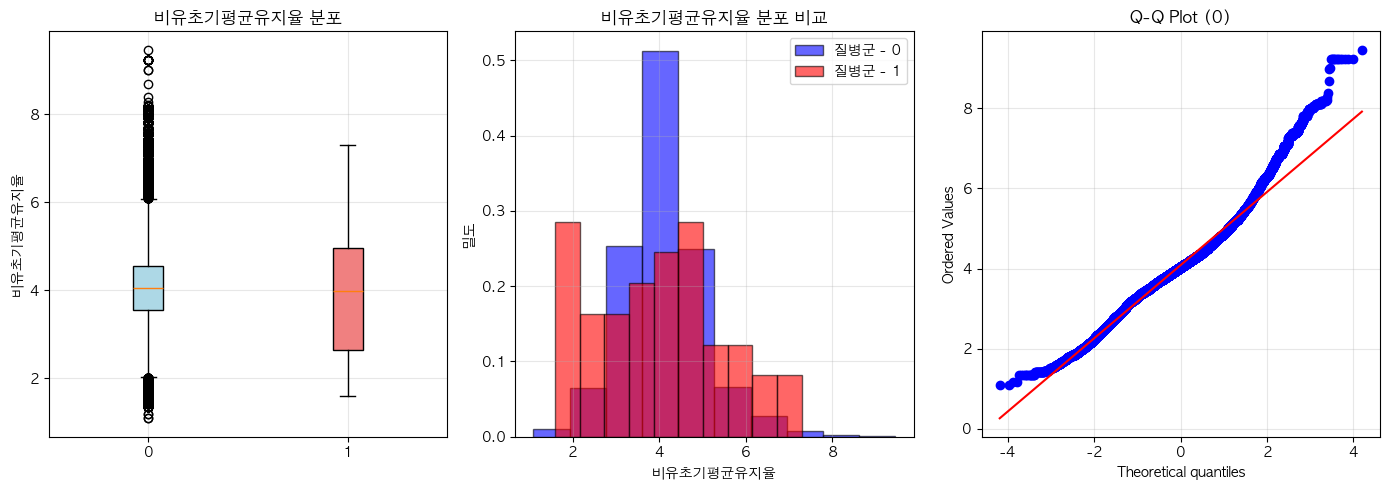


[등분산성 검정]
----------------------------------------
4.3495374192009987e-10
Levene's test p-value: 0.0000

[데이터 정규성 검정] n=50814
----------------------------------------
왜도(Skewness): 0.571
첨도(Kurtosis): 1.713
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=43
----------------------------------------
왜도(Skewness): 0.274
첨도(Kurtosis): -0.766
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Welch's t-test 결과:
t = 0.4906, p = 0.6262
Cohen's d = 0.091 (매우 작은 효과)

[결론]
❌ p-value(0.6262) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


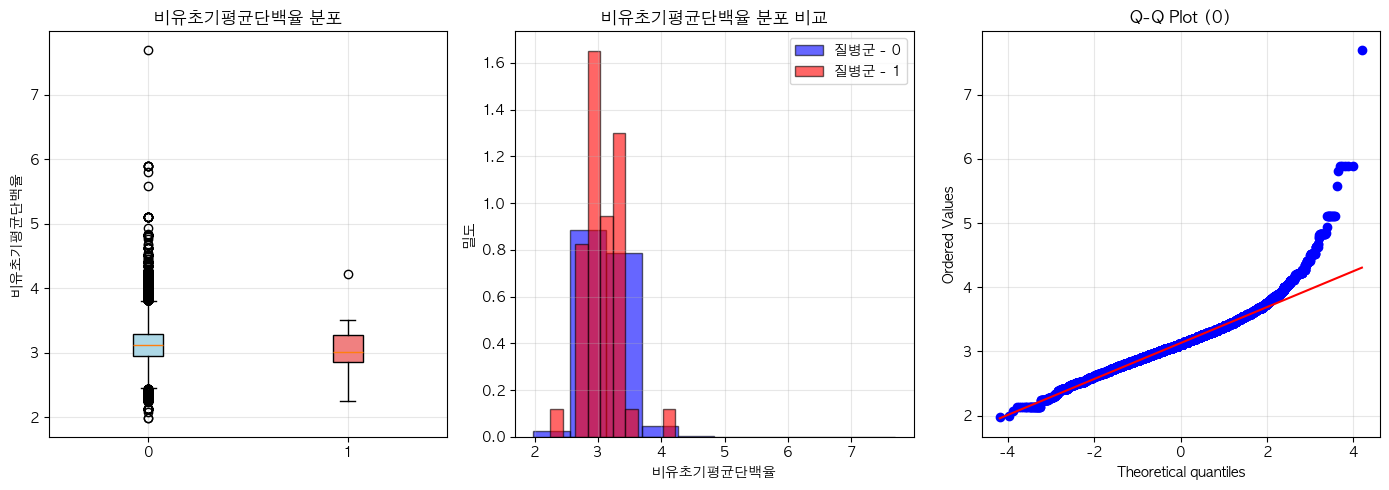


[등분산성 검정]
----------------------------------------
0.7244959182207898
Levene's test p-value: 0.7245

[데이터 정규성 검정] n=50814
----------------------------------------
왜도(Skewness): 0.789
첨도(Kurtosis): 4.378
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=43
----------------------------------------
왜도(Skewness): 0.849
첨도(Kurtosis): 3.407
추가 Shapiro-Wilk p-value: 0.0061
결과: ❌ 정규분포 가정 위반 (Shapiro p=≤0.05)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.5

Mann-Whitney U test 결과:
U = 1258241.0000, p = 0.0850

[결론]
✅ p-value(0.0850) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


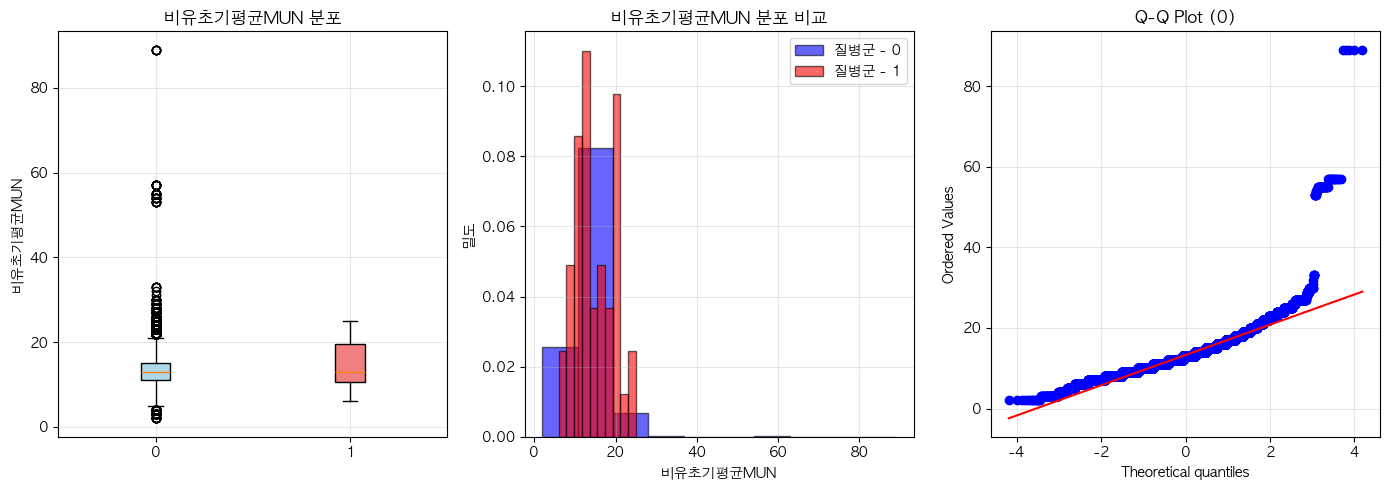


[등분산성 검정]
----------------------------------------
0.0006500483473732242
Levene's test p-value: 0.0007

[데이터 정규성 검정] n=50972
----------------------------------------
왜도(Skewness): 2.434
첨도(Kurtosis): 25.098
결과: ❌ 정규분포 가정 위반 (|왜도|≥2 (중심극한정리))

[데이터 정규성 검정] n=43
----------------------------------------
왜도(Skewness): 0.301
첨도(Kurtosis): -0.989
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.5

Mann-Whitney U test 결과:
U = 929239.0000, p = 0.0829

[결론]
✅ p-value(0.0829) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


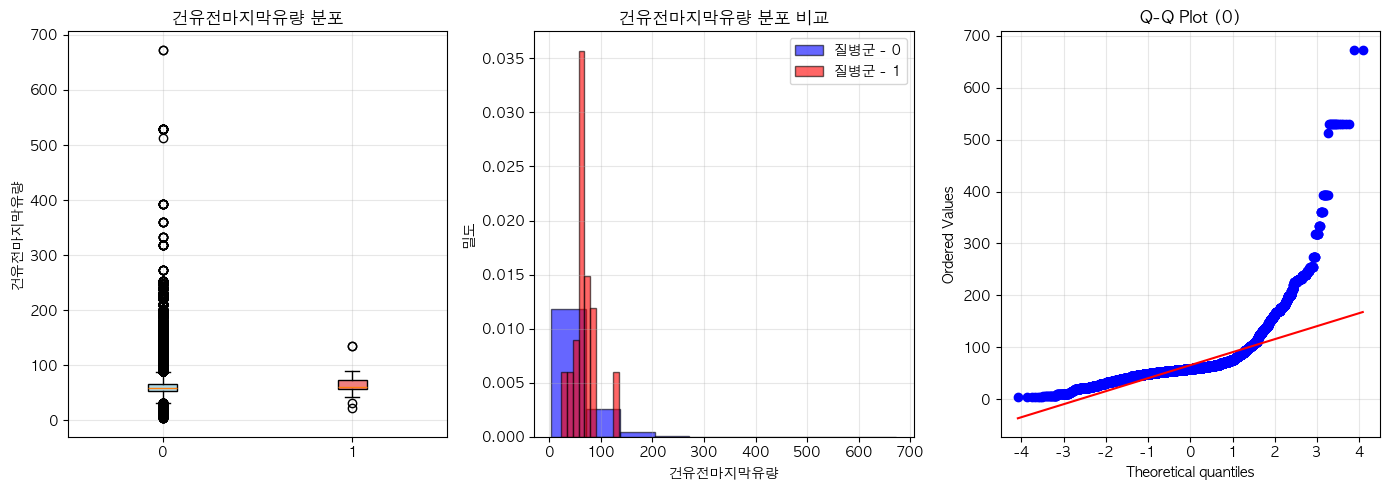


[등분산성 검정]
----------------------------------------
0.8576439285304251
Levene's test p-value: 0.8576

[데이터 정규성 검정] n=31056
----------------------------------------
왜도(Skewness): 4.768
첨도(Kurtosis): 43.852
결과: ❌ 정규분포 가정 위반 (|왜도|≥2 (중심극한정리))

[데이터 정규성 검정] n=30
----------------------------------------
왜도(Skewness): 1.373
첨도(Kurtosis): 2.778
추가 Shapiro-Wilk p-value: 0.0006
결과: ❌ 정규분포 가정 위반 (Shapiro p=≤0.05)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.5

Mann-Whitney U test 결과:
U = 403597.0000, p = 0.2050

[결론]
✅ p-value(0.2050) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


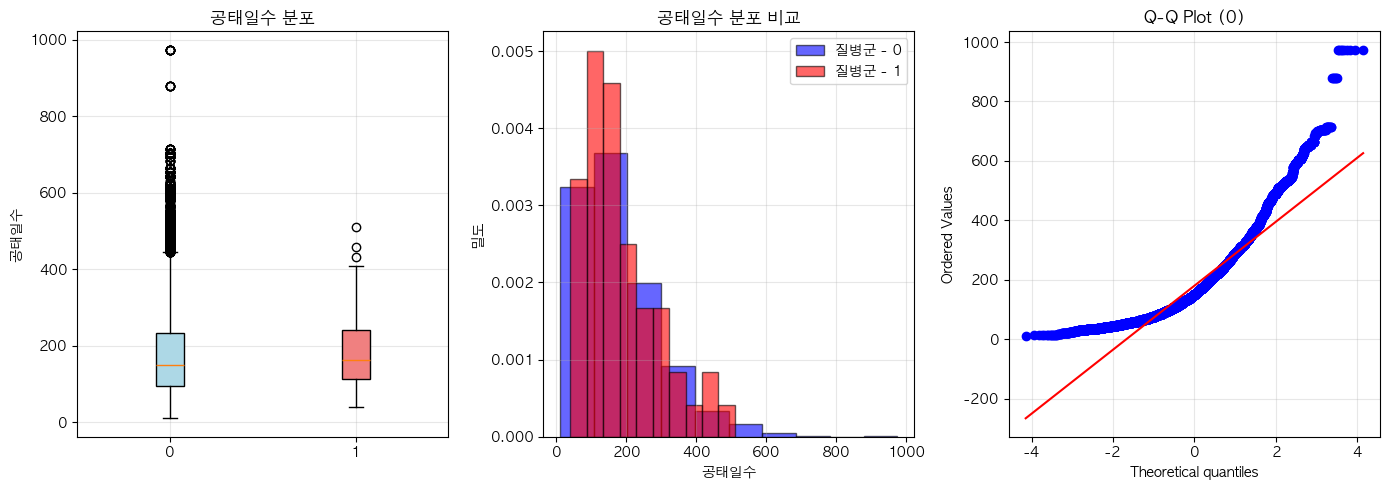


[등분산성 검정]
----------------------------------------
0.7813754705023638
Levene's test p-value: 0.7814

[데이터 정규성 검정] n=40376
----------------------------------------
왜도(Skewness): 1.389
첨도(Kurtosis): 2.479
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=51
----------------------------------------
왜도(Skewness): 1.100
첨도(Kurtosis): 0.697
추가 Shapiro-Wilk p-value: 0.0006
결과: ❌ 정규분포 가정 위반 (Shapiro p=≤0.05)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.5

Mann-Whitney U test 결과:
U = 968491.0000, p = 0.4632

[결론]
✅ p-value(0.4632) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


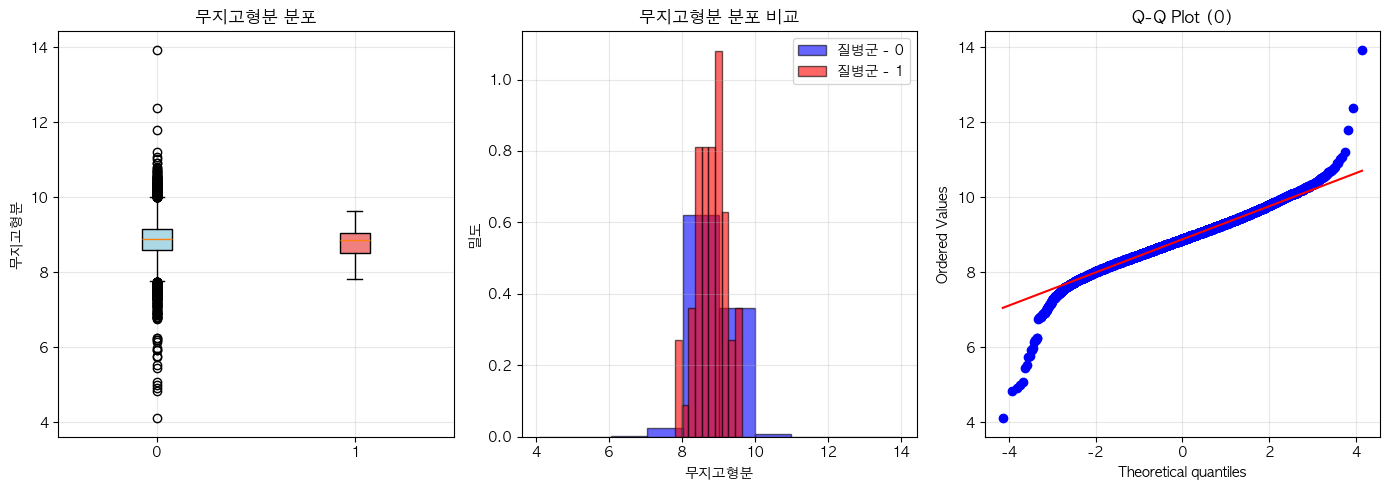


[등분산성 검정]
----------------------------------------
0.7658103497821374
Levene's test p-value: 0.7658

[데이터 정규성 검정] n=41858
----------------------------------------
왜도(Skewness): -0.076
첨도(Kurtosis): 2.436
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): -0.125
첨도(Kurtosis): -0.231
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = 1.4280, p = 0.1533
Cohen's d = 0.189 (매우 작은 효과)

[결론]
✅ p-value(0.1533) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


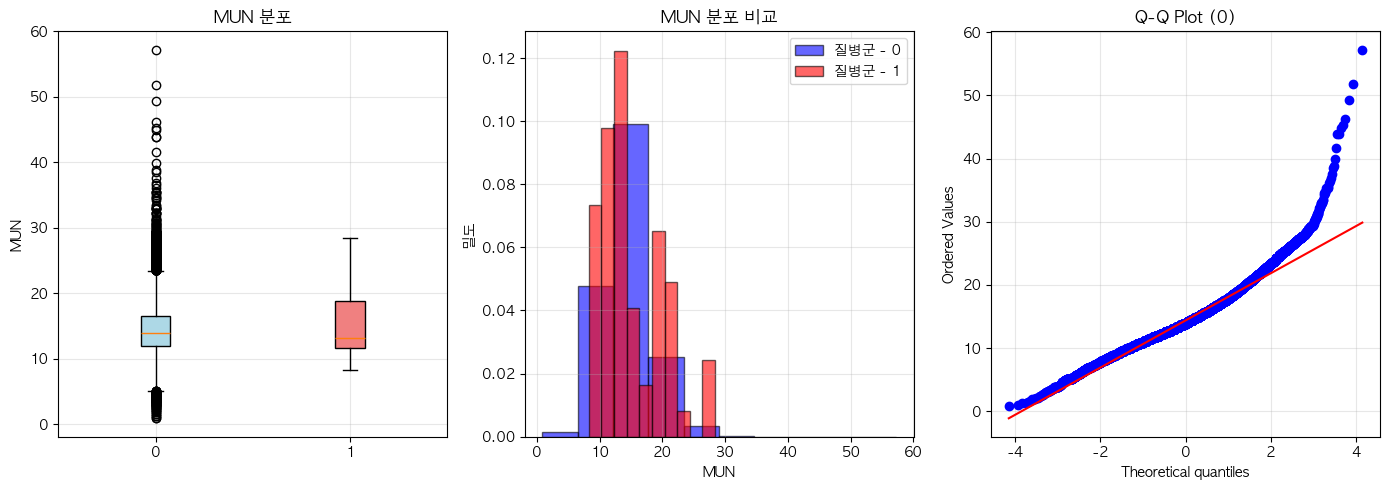


[등분산성 검정]
----------------------------------------
0.0015162571849361328
Levene's test p-value: 0.0015

[데이터 정규성 검정] n=42022
----------------------------------------
왜도(Skewness): 0.810
첨도(Kurtosis): 2.551
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.875
첨도(Kurtosis): 0.160
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Welch's t-test 결과:
t = -1.0477, p = 0.2990
Cohen's d = -0.152 (매우 작은 효과)

[결론]
✅ p-value(0.2990) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


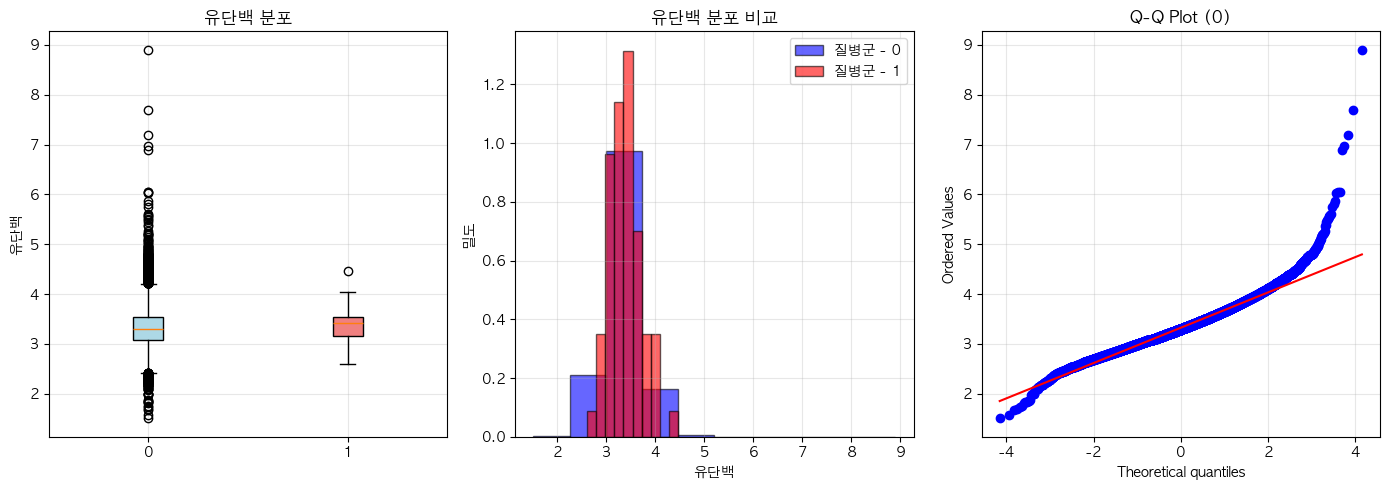


[등분산성 검정]
----------------------------------------
0.5751034396242563
Levene's test p-value: 0.5751

[데이터 정규성 검정] n=41858
----------------------------------------
왜도(Skewness): 0.717
첨도(Kurtosis): 4.072
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.513
첨도(Kurtosis): 0.782
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Student's t-test 결과:
t = -1.4251, p = 0.1541
Cohen's d = -0.188 (매우 작은 효과)

[결론]
✅ p-value(0.1541) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


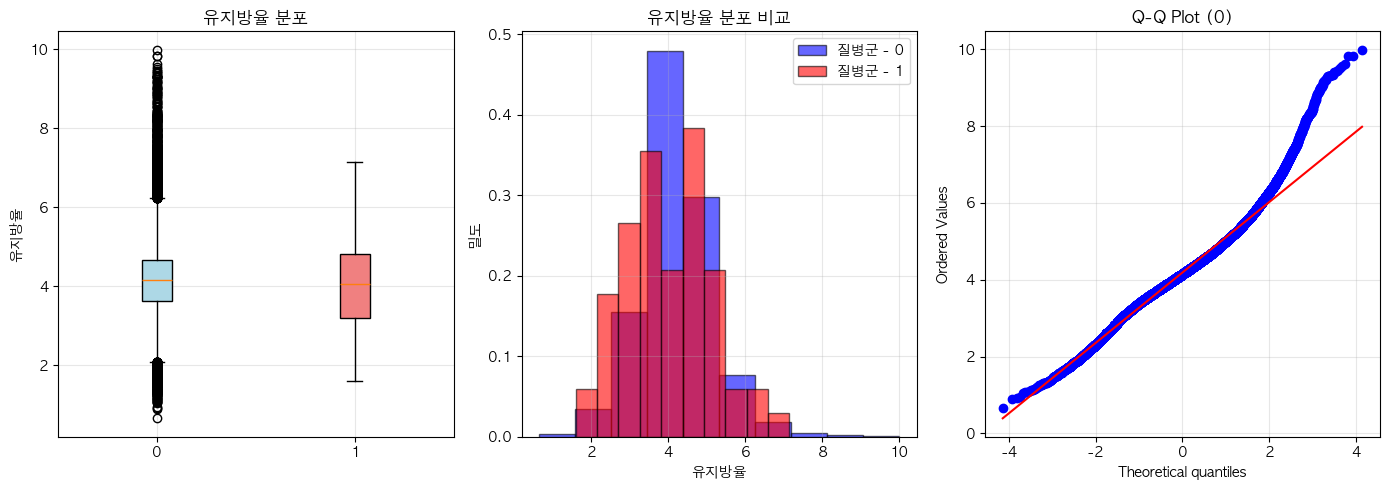


[등분산성 검정]
----------------------------------------
0.0008338365946597477
Levene's test p-value: 0.0008

[데이터 정규성 검정] n=41858
----------------------------------------
왜도(Skewness): 0.508
첨도(Kurtosis): 2.058
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.205
첨도(Kurtosis): -0.224
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Welch's t-test 결과:
t = 1.1188, p = 0.2677
Cohen's d = 0.159 (매우 작은 효과)

[결론]
✅ p-value(0.2677) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


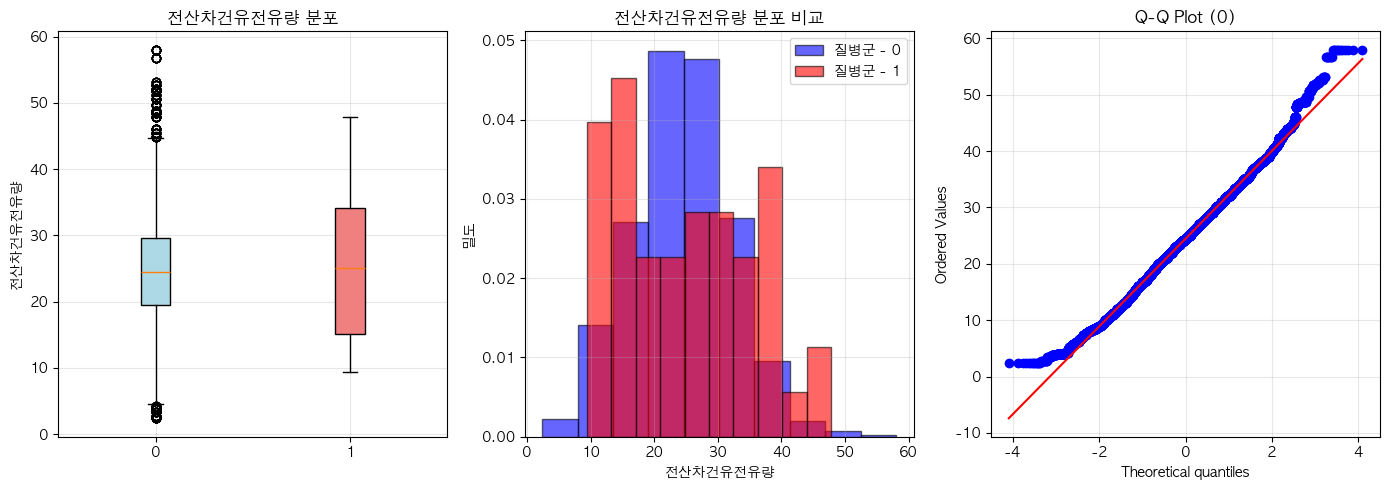


[등분산성 검정]
----------------------------------------
1.5201161566886938e-05
Levene's test p-value: 0.0000

[데이터 정규성 검정] n=33552
----------------------------------------
왜도(Skewness): 0.112
첨도(Kurtosis): 0.181
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=46
----------------------------------------
왜도(Skewness): 0.237
첨도(Kurtosis): -1.076
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.5

Welch's t-test 결과:
t = -0.4924, p = 0.6248
Cohen's d = -0.083 (매우 작은 효과)

[결론]
❌ p-value(0.6248) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음


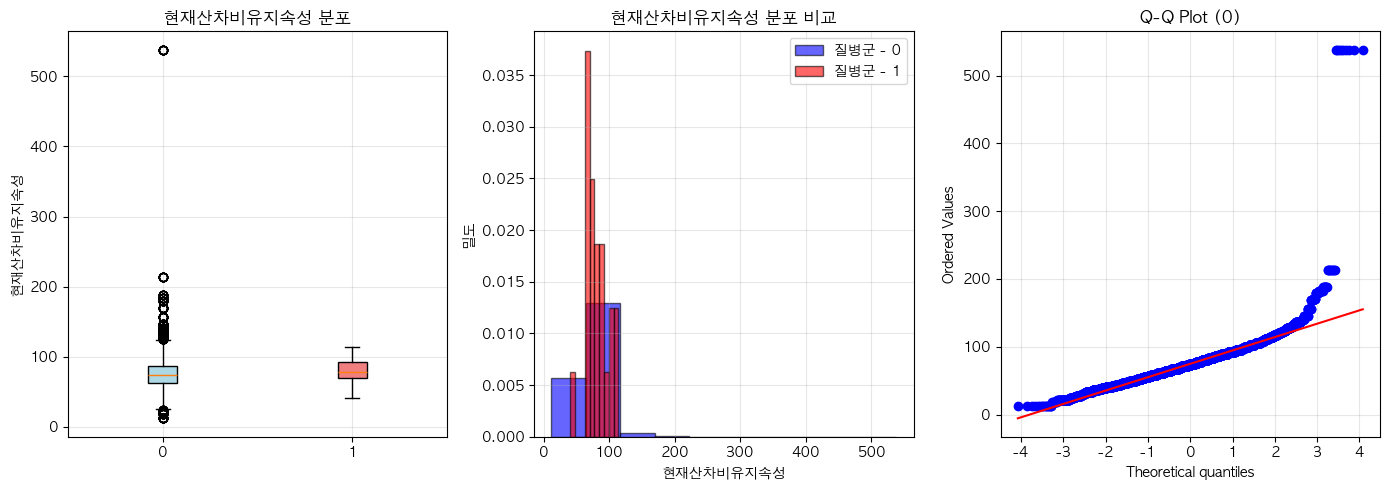


[등분산성 검정]
----------------------------------------
0.5007435551679918
Levene's test p-value: 0.5007

[데이터 정규성 검정] n=30473
----------------------------------------
왜도(Skewness): 3.607
첨도(Kurtosis): 70.259
결과: ❌ 정규분포 가정 위반 (|왜도|≥2 (중심극한정리))

[데이터 정규성 검정] n=22
----------------------------------------
왜도(Skewness): 0.090
첨도(Kurtosis): -0.006
Shapiro-Wilk p-value: 0.4125
결과: ✅ 정규분포 가정 충족 (Shapiro p=>0.05)

[가설검정]
----------------------------------------
H₀: 두 클래스의 분포가 같다 (중앙값 차이가 없다)
H₁: 두 클래스의 분포가 다르다 (중앙값 차이가 있다)
유의수준: α = 0.5

Mann-Whitney U test 결과:
U = 265193.5000, p = 0.0898

[결론]
✅ p-value(0.0898) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


In [11]:

dv_cols = [
    '305일유량','305일유지량','305일유단백','305일무지고형분',
    '비유최고도달일수','비유후기최고유량','비유초기평균유지율','비유초기평균단백율','비유초기평균MUN',
    '건유전마지막유량',
    '공태일수',
    # '농후사료급여량(연계)',
    # '농후사료비(연계)',
    # '누적착유일(연계)',
    '무지고형분',
    # '산차',
    'MUN',
    '유단백',
    '유지방율',
    '전산차건유전유량',
    '현재산차비유지속성',
    # '출생년도'
]

result_lst =[]
iv_col = '질병군'

for dv_col in dv_cols:
    cond = milk_data[dv_col] != 0
    class0_data = milk_data[cond & (milk_data[iv_col] == 0)][dv_col].dropna()
    class1_data = milk_data[cond & (milk_data[iv_col] == 1)][dv_col].dropna()
    result = ttest.execute(class0_data, class1_data, iv_col=iv_col, dv_col=dv_col)
    result_lst.append(result)

In [17]:
small_lst = []

for dv_col, result in zip(dv_cols, result_lst):
    print('='*50)
    print(f'{dv_col} 검정 결과')
    print('='*50)
    
    r = result.to_dict()
    # print(f'p-value: {r["p_value"]:.4f}')
    print(r['conclusion'])
    print(r['effect_interpretation'])
    print(f'효과 크기: {r["effect_size"]}')
    print()
    
    if r['effect_interpretation'] in ['작은 효과', '중간 효과', '큰 효과']:
        small_lst.append(dv_col)

305일유량 검정 결과
✅ p-value(0.0287) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.29925078980745035

305일유지량 검정 결과
❌ p-value(0.5827) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: 0.09703006101597089

305일유단백 검정 결과
✅ p-value(0.0165) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.33153022203488475

305일무지고형분 검정 결과
✅ p-value(0.0225) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.3119801371534413

비유최고도달일수 검정 결과
✅ p-value(0.0011) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.4805456333714184

비유후기최고유량 검정 결과
❌ p-value(0.9615) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: -0.0059182278420499305

비유초기평균유지율 검정 결과
❌ p-value(0.6262) ≥ 0.5 → 귀무가설 채택
   두 클래스에 유의한 차이가 없음
매우 작은 효과
효과 크기: 0.09087211647780463

비유초기평균단백율 검정 결과
✅ p-value(0.0850) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: 0.15170695495930886

비유초기평균MUN 검정 결과
✅ p-value(0.0829) < 0.5 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음
작은 효과
효과 크기: -0.1520752843786557

건유전마지막유량 검정 결과
✅ p-value(0.2050) < 0.5 → 귀무가설 기각
 

In [18]:
small_lst

['305일유량',
 '305일유단백',
 '305일무지고형분',
 '비유최고도달일수',
 '비유초기평균단백율',
 '비유초기평균MUN',
 '건유전마지막유량',
 '현재산차비유지속성']